# MadMiner physics tutorial (part 4B)

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [11]:
import logging

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d

In [12]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information from a SALLY model

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [13]:
fisher = FisherInformation("data/lhe_data_shuffled.h5")
# fisher = FisherInformation('data/delphes_data_shuffled.h5')

14:20 madminer.analysis.da INFO    Loading data from data/lhe_data_shuffled.h5
14:20 madminer.utils.inter INFO    HDF5 file does not contain nuisance parameters information
14:20 madminer.utils.inter INFO    HDF5 file does not contain finite difference information
14:20 madminer.utils.inter INFO    HDF5 file does not contain systematic information
14:20 madminer.analysis.da INFO    Found 2 parameters
14:20 madminer.analysis.da INFO      0: CWL2 (LHA: dim6 2, Power: 2, Range: (-20.0, 20.0))
14:20 madminer.analysis.da INFO      1: CPWL2 (LHA: dim6 5, Power: 2, Range: (-20.0, 20.0))
14:20 madminer.analysis.da INFO    Did not find nuisance parameters
14:20 madminer.analysis.da INFO    Found 6 benchmarks
14:20 madminer.analysis.da INFO    Found 3 observables
14:20 madminer.analysis.da INFO    Found 89993 events
14:20 madminer.analysis.da INFO      49993 signal events sampled from benchmark sm
14:20 madminer.analysis.da INFO      10000 signal events sampled from benchmark w
14:20 madminer.an

This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [14]:
info_sally, _ = fisher.full_information(
    theta=[0.0, 0.0],
    model_file="models/sally",
    luminosity=300.0 * 1000.0,
)

print("Fisher information after 300 ifb:\n{}".format(info_sally))

14:20 madminer.ml.base     INFO    Loading model from models/sally
14:20 madminer.fisherinfor INFO    Found 2 parameters in Score Estimator model, matching 2 physical parameters in MadMiner file
14:20 madminer.fisherinfor INFO    Evaluating rate Fisher information
14:20 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
14:20 madminer.ml.base     INFO    Loading evaluation data
14:20 madminer.ml.base     INFO    Calculating Fisher information


Fisher information after 300 ifb:
[[184.46110427  -1.24348367]
 [ -1.24348367 113.85189984]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [15]:
info_histo_1d, cov_histo_1d = fisher.histo_information(
    theta=[0.0, 0.0],
    luminosity=300.0 * 1000.0,
    observable="pt_j1",
    bins=[30.0, 100.0, 200.0, 400.0],
    histrange=[30.0, 400.0],
)

print("Histogram Fisher information after 300 ifb:\n{}".format(info_histo_1d))

14:20 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
14:20 madminer.fisherinfor INFO      Bin 1: (0.01470 +/- 0.00202) fb (14 %)
14:20 madminer.fisherinfor INFO      Bin 5: (0.00611 +/- 0.00022) fb (4 %)
14:20 madminer.fisherinfor INFO      Bin 2: (0.59045 +/- 0.01587) fb (3 %)
14:20 madminer.fisherinfor INFO      Bin 3: (0.33968 +/- 0.00669) fb (2 %)
14:20 madminer.fisherinfor INFO      Bin 4: (0.07276 +/- 0.00119) fb (2 %)
14:20 madminer.fisherinfor WARNING Cannot include nuisance parameters as none were found in the setup file


Histogram Fisher information after 300 ifb:
[[ 1.20588974e+02 -5.86396609e-01]
 [-5.86396609e-01  6.50509161e-02]]


We can do the same thing in 2D:

In [16]:
info_histo_2d, cov_histo_2d = fisher.histo_information_2d(
    theta=[0.0, 0.0],
    luminosity=300.0 * 1000.0,
    observable1="pt_j1",
    bins1=[30.0, 100.0, 200.0, 400.0],
    histrange1=[30.0, 400.0],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0, 6.2],
)

print("Histogram Fisher information after 300 ifb:\n{}".format(info_histo_2d))

14:20 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
14:20 madminer.fisherinfor INFO      Bin (1, 4): (0.00135 +/- 0.00049) fb (36 %)
14:20 madminer.fisherinfor INFO      Bin (1, 3): (0.00346 +/- 0.00085) fb (25 %)
14:20 madminer.fisherinfor INFO      Bin (1, 1): (0.00795 +/- 0.00174) fb (22 %)
14:20 madminer.fisherinfor INFO      Bin (1, 2): (0.00195 +/- 0.00034) fb (17 %)
14:20 madminer.fisherinfor INFO      Bin (5, 4): (0.00100 +/- 0.00010) fb (10 %)
14:20 madminer.fisherinfor WARNING Cannot include nuisance parameters as none were found in the setup file


Histogram Fisher information after 300 ifb:
[[131.93760317   1.33467507]
 [  1.33467507  90.6301305 ]]


## 2. Calculating the Fisher information from a SALLY model

We can also calculate the Fisher Information using an ALICES model

In [17]:
info_alices, _ = fisher.full_information(
    theta=[0.0, 0.0],
    model_file="models/alices",
    luminosity=300.0 * 1000.0,
)

print("Fisher information using ALICES after 300 ifb:\n{}".format(info_alices))

14:20 madminer.ml.base     INFO    Loading model from models/alices
14:20 madminer.fisherinfor INFO    Found 2 parameters in Parameterized Ratio Estimator model, matching 2 physical parameters in MadMiner file
14:20 madminer.fisherinfor INFO    Evaluating rate Fisher information
14:20 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
14:20 madminer.ml.base     INFO    Loading evaluation data
14:20 madminer.ml.base     INFO    Calculating Fisher information


Fisher information using ALICES after 300 ifb:
[[128.48070599  -1.53107393]
 [ -1.53107393  96.49565785]]


## 3. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

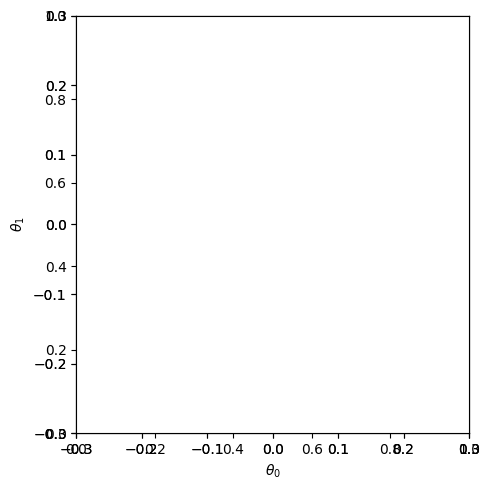

In [18]:
_ = plot_fisher_information_contours_2d(
    [info_sally, info_histo_1d, info_histo_2d, info_alices],
    [None, cov_histo_1d, cov_histo_2d, None],
    inline_labels=["SALLY", "1d", "2d", "ALICES"],
    xrange=(-0.3, 0.3),
    yrange=(-0.3, 0.3),
)